# Titanic Dataset with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Data Exploration

In [2]:
#Using info to get details about the data set. We can see the datatypes under each 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
#Running describes understanding the distribution of the data we have
#Notice that it only runs the numerical data (float, int)
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#We can run the summary of the categorical variables. 
#We can first get the whether the datatypes of each column in the data is an object or not
are_they_categorical = df.dtypes == "object"
print(are_they_categorical)

survived       False
pclass         False
sex             True
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who             True
adult_male     False
deck           False
embark_town     True
alive           True
alone          False
dtype: bool


In [5]:
#We can then isolate the columns where the statement is true
#Note how we use df.dtypes twice for this to work. The result will be a panda series that has
#..column names as the index. We then get that index using ".index"
categorical_variables = df.dtypes[df.dtypes == "object"].index
print(categorical_variables)

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')


In [6]:
#We can get some descriptions of the categorical data in this state
#We do this by referring to the dataframe using the new constructed index
df[categorical_variables].describe()

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [7]:
del df["embarked"]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True


In [8]:
surv = df[["survived", "alive"]]
surv

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no
...,...,...
886,0,no
887,1,yes
888,0,no
889,1,yes


,survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


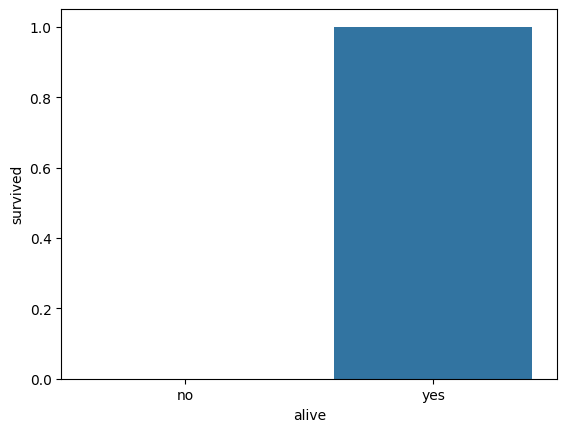

In [9]:
sns.barplot(x="alive", y="survived", data=surv)
surv.describe()

In [10]:
del df["survived"]
df

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True


In [11]:
ord_pclass = pd.Categorical(df["pclass"], ordered=True)
ord_pclass = ord_pclass.rename_categories(["First class", "Second class", "Third class"])
ord_pclass.describe()

,counts,freqs
categories,,
First class,216,0.242424
Second class,184,0.206510
Third class,491,0.551066


In [12]:
df["ord_pclass"] = ord_pclass
df.head()

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,ord_pclass
0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,Third class
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,First class
2,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,Third class
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,First class
4,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,Third class


In [13]:
#Getting the arrray of all the missing variables when looking at age
missing_age = np.where((df["age"].isnull() == True))
print(missing_age)

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888], dtype=int64),)


In [14]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

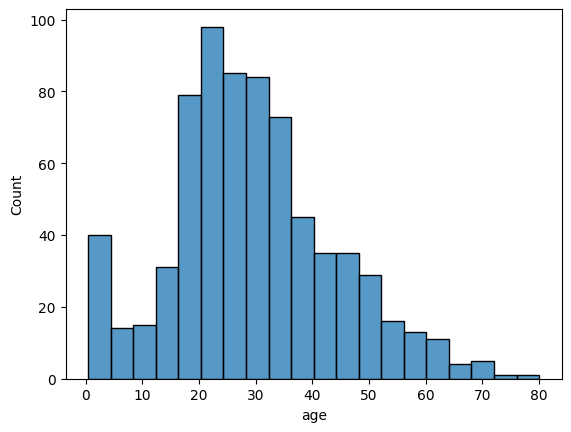

In [15]:
#Looking at the distribution of the age variable.
sns.histplot(x="age", data=df)

In [16]:
#The variable follows somewhat of a normal distribuion with a slight skew to the left
#Thus it would not be amiss to approximate it with a measure of central tendeancy.
    #The mean of the variable is 29.6, we can thus use a logical statement to replace it with 30 as an approximation

approx_age = np.where(df["age"].isnull() == True, 30, 
         df["age"]) #The expression uses where the value of age is null, assign 30, else let the value of age be the original values
series_age = pd.Series(approx_age)
series_age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
dtype: float64

<Axes: xlabel='adjusted_age', ylabel='Count'>

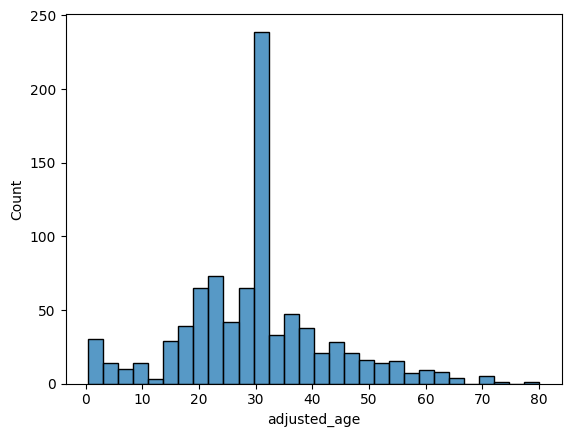

In [17]:
#Let us add the data into the the dataframe we are using
df["adjusted_age"] = series_age
sns.histplot(x="adjusted_age", data=df)

In [18]:
df.describe()

,pclass,age,sibsp,parch,fare,adjusted_age
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,29.758889
std,0.836071,14.526497,1.102743,0.806057,49.693429,13.002570
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,30.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


<Axes: ylabel='fare'>

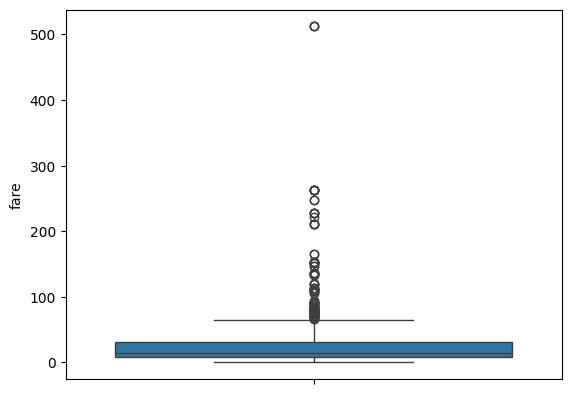

In [19]:
#Looking at outliers in the fare variable
sns.boxplot(y="fare", data=df, showfliers = True)

In [20]:
#Let us see who paid such an astronomical amount as fare
#It is necessary to keep in mind the presence of outliers
index = np.where(df["fare"] == max(df["fare"]))
print(df.loc[index])

     pclass     sex   age  sibsp  parch      fare  class    who  adult_male  \
258       1  female  35.0      0      0  512.3292  First  woman       False   
679       1    male  36.0      0      1  512.3292  First    man        True   
737       1    male  35.0      0      0  512.3292  First    man        True   

    deck embark_town alive  alone   ord_pclass  adjusted_age  
258  NaN   Cherbourg   yes   True  First class          35.0  
679    B   Cherbourg   yes  False  First class          36.0  
737    B   Cherbourg   yes   True  First class          35.0  


In [21]:
#We can also create new variables an example in this case is the family variable which can be created by combining the variables
        #parch and sibsp

family = df["parch"] + df ["sibsp"]
df["family_members"] = family
df

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,ord_pclass,adjusted_age,family_members
0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,Third class,22.0,1
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,First class,38.0,1
2,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,Third class,26.0,0
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,First class,35.0,1
4,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,Third class,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,Second class,27.0,0
887,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,First class,19.0,0
888,3,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,Third class,30.0,3
889,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,First class,26.0,0


## Logistic Regeression

In [22]:
from sklearn import linear_model
from sklearn import preprocessing

In [23]:
#Initiazie the labelling encoder

label_encoder = preprocessing.LabelEncoder()
#Converting sex variable into number
encoded_sex = label_encoder.fit_transform(df["sex"])

#Initializing the logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

#Training the model

log_model.fit(
    X = pd.DataFrame(encoded_sex),
    y = df["alive"]
)

LogisticRegression()

In [24]:
print(log_model.intercept_)
print(log_model.coef_)

[1.01693725]
[[-2.44646935]]


In [25]:
log_model.score(
    X = pd.DataFrame(encoded_sex),
    y = df["alive"]
)


0.7867564534231201

In [26]:
#Introducing more predictor variables
encoded_class = label_encoder.fit_transform(df["class"])
encoded_alone = label_encoder.fit_transform(df["alone"])

predictor_variables = pd.DataFrame(
    [
        encoded_class,
        encoded_sex,
        encoded_alone
    ]
)




log_model.fit(
    X = predictor_variables.T,
    y = df["alive"]
)

LogisticRegression()

In [27]:
#Making prediction and comparing to what happened

pred = log_model.predict(X = predictor_variables.T)

pd.crosstab(pred, df["alive"])

alive,no,yes
row_0,,
no,468,109
yes,81,233


In [28]:
log_model.score(
   X = predictor_variables.T,
    y = df["alive"]
)

0.7867564534231201

In [29]:
#Getting the confusion matrix
from sklearn import metrics

metrics.confusion_matrix(
     y_pred = pred,
    y_true = df["alive"]
)

array([[468,  81],
       [109, 233]], dtype=int64)

In [30]:
print(metrics.classification_report(
        y_pred = pred,
        y_true = df["alive"]
))

              precision    recall  f1-score   support

          no       0.81      0.85      0.83       549
         yes       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

